# Krypton XY Lifetime maps

## SM: Single Map (in time). 

### Author: GML, JAH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import time
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Sun Sep  2 10:23:00 2018


### Logger

In [2]:
import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2018-09-02 10:23:09,789 | INFO : Hello world!


### Input files

In [2]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

input_file_names  = ['dst_6284_trigger1_0000_7920.h5']
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_6284.h5'
map_file_name_ts  = 'kr_maps_xy_ts_6284.h5'
emap_file_name    = ' '


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [5]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [6]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [7]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [8]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [9]:
from krcal.core.stat_functions      import mean_and_std

In [13]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map
from krcal.core.analysis_functions  import plot_sector
from krcal.core.analysis_functions  import plot_sectors
from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [14]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_functions    import print_fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map
from krcal.core.fit_lt_functions    import fit_map_xy

In [15]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy

In [16]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [17]:
from krcal.core.map_functions   import draw_wedges
from krcal.core.map_functions   import define_rphi_sectors
from krcal.core.map_functions   import rphi_sector_alpha_map
from krcal.core.map_functions   import rphi_sector_map
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import draw_maps
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import draw_xy_maps
from krcal.core.map_functions   import draw_xy_map
from krcal.core.map_functions   import draw_xy_maps_ts
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [18]:
import krcal.dev.corrections       as corrections 


In [19]:
from numpy import pi, sqrt

In [20]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [21]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Input/output 

In [22]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [23]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6284_trigger1_0000_7920.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_6284.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_ts_6284.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/ ')

In [24]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [25]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {number_of_evts_full}")

Total number of events: 1583342


In [26]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [27]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [28]:
RMAX      = 200

s1e_range = (2, 30)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (50,  550)
e_range = (5000, 14000)
lt_range = (1000, 5000)
c2_range = (0,3)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 10,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [29]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

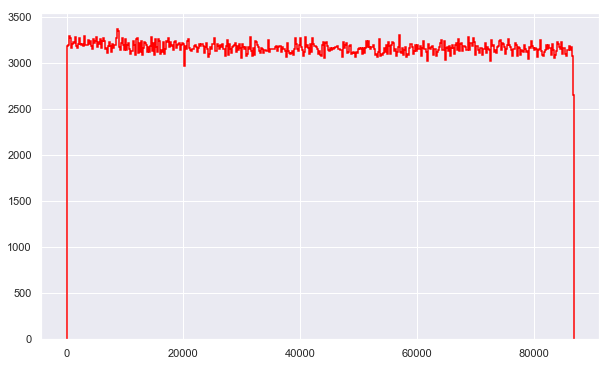

In [30]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

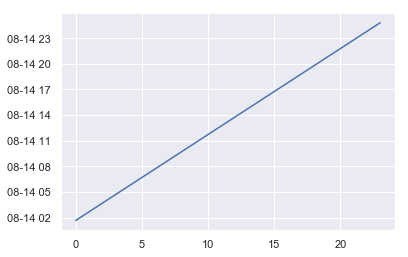

In [31]:
plt.plot(krTimes.timeStamps)

### Event distribution

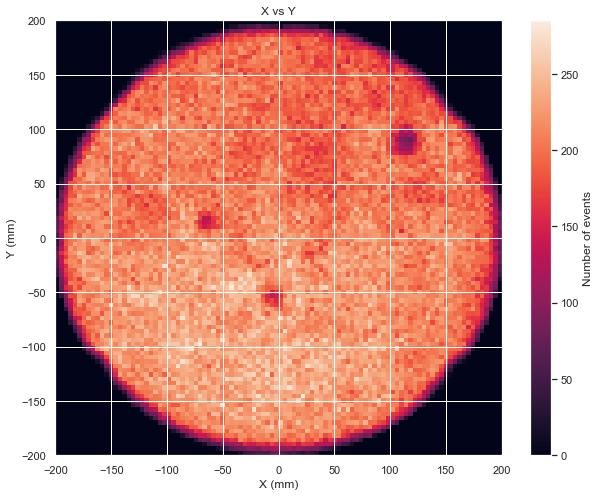

In [32]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Divide chamber in sectors of XY

In [3]:
t0 = time.time()
KRES = select_xy_sectors(dst,DT, dst.S2e, dst.S2q, krNbins, krBins, verbose = True)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

NameError: name 'select_xy_sectors' is not defined

In [35]:
neM = event_map(KRES)

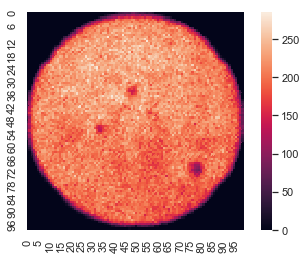

In [36]:
ax = sns.heatmap(neM, square=True)

#### Notice that binning in X-Y does not take advantage of the chamber symmetry which is obviously R-phi. Thus, many bins in the KRES map will be zero. 

## Fits in XY sectors

### Lifetime is fitted each XT seconds in the radial sectors (0 to 9) defined.

In [40]:
XT = 86000

#### For example, next cell shows a fit to cell (30,30) in the XY partition of chamber

In [62]:
fp = fit_fcs_in_xy_bin (xybin          = (30,30),    
                        event_map      = neM, 
                        time_bins      = XT, 
                        time_diff      = DT, 
                        selection_map  = KRES, 
                        nbins_z        = krNbins.Z, 
                        nbins_e        = krNbins.S2e, 
                        range_z        = z_range, 
                        range_e        = e_range,
                        energy         = 'S2e', 
                        fit            = FitType.profile,
                        n_min          = 100,
                        verbose        = True)

XT = 86000, DT[-1] = 86880.49799990654
indx = [(0, 86880)]
len(indx) = 1
indx[0][0] = 0
indx[0][1] = 86880
range(len(indx)) = [0]
ts = [43440.0]
length of masks = 1, lenght of 1st mask =225
length of X = 225
length of masks = 1, lenght of 1st mask =225
length of kcts = 1, lenght of 1st kre.E=225


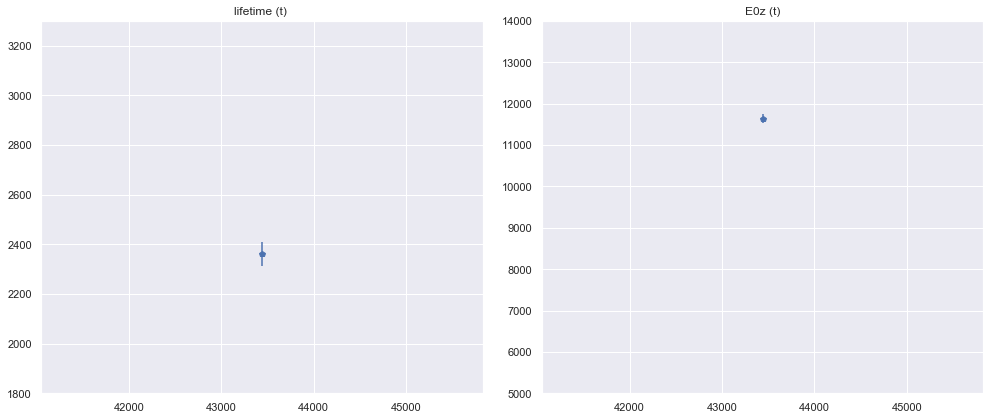

In [63]:
plot_fit_xy(fp,  range_e0 =e_range, range_lt=(1800, 3300))

In [66]:
fp = fit_fcs_in_xy_bin (xybin          = (15,15),    
                        event_map      = neM, 
                        time_bins      = XT, 
                        time_diff      = DT, 
                        selection_map  = KRES, 
                        nbins_z        = krNbins.Z, 
                        nbins_e        = krNbins.S2e, 
                        range_z        = z_range, 
                        range_e        = e_range,
                        energy         = 'S2e', 
                        fit            = FitType.profile,
                        n_min          = 100,
                        verbose        = True)

fitting bin (15,15) with 110 events
XT = 86000, DT[-1] = 86880.49799990654
indx = [(0, 86880)]
len(indx) = 1
ts = [43440.0]


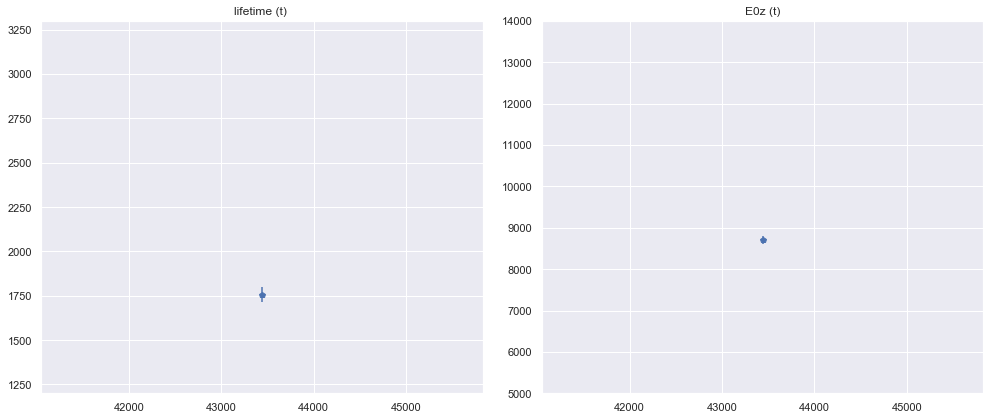

In [68]:
plot_fit_xy(fp,  range_e0 =e_range, range_lt=(1200, 3300))

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```
Thus, each bin contains 6 time series; ts is time (time difference wrt to the start of the run); e0, lt... are fitted parameters to time slices.

In [4]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmap = fit_map_xy(event_map      = neM,
                      time_bins      = XT, 
                      time_diff      = DT, 
                      selection_map  = KRES, 
                      nbins_z        = krNbins.Z, 
                      nbins_e        = krNbins.S2e, 
                      range_z        = z_range, 
                      range_e        = e_range,
                      range_chi2     = c2_range,
                      range_lt       = lt_range,
                      energy         = 'S2e', 
                      fit            = FitType.profile,
                      n_min          = 100,
                      verbose        = True,
                      nprint         = 10)
t1 = time.time()
print(f' fmap: t = {t1 -t0}')

NameError: name 'warnings' is not defined

In [142]:
times = fmap[0][0].ts

In [143]:
times

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [144]:
tsm = tsmap_from_fmap(fmap, verbose  = False)

<ErrorbarContainer object of 3 artists>

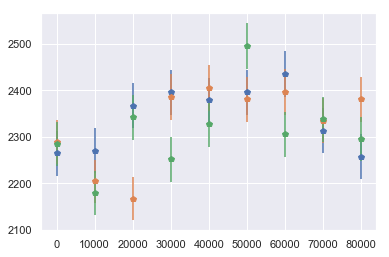

In [146]:
plt.errorbar(times, tsm.lt[25][25], np.sqrt(tsm.lt[25][25]), fmt="p")
plt.errorbar(times, tsm.lt[25][21], np.sqrt(tsm.lt[25][21]), fmt="p")
plt.errorbar(times, tsm.lt[25][22], np.sqrt(tsm.lt[25][22]), fmt="p")

<ErrorbarContainer object of 3 artists>

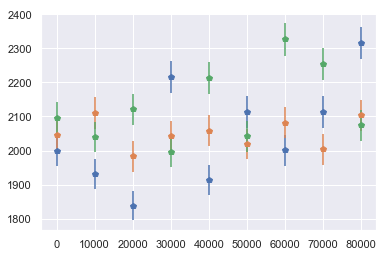

In [148]:
plt.errorbar(times, tsm.lt[6][10], np.sqrt(tsm.lt[6][10]), fmt="p")
plt.errorbar(times, tsm.lt[6][11], np.sqrt(tsm.lt[6][11]), fmt="p")
plt.errorbar(times, tsm.lt[6][12], np.sqrt(tsm.lt[6][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### Example: map in the first time series

In [149]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [150]:
amap_average(am) 

ASectorMap(chi2=1.240311318562524, e0=10026.239537666434, lt=2246.6008304069874, e0u=58.922056706078756, ltu=107.60202969627915)

#### Get rid of outlayers that distort mean and error

In [151]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3000.0


In [152]:
amap_average(rmap)

ASectorMap(chi2=1.240311318562524, e0=10026.239537666434, lt=2246.6008304069874, e0u=58.922056706078756, ltu=107.60202969627915)

In [153]:
asm = relative_errors(rmap)

In [154]:
amap_average(asm)

ASectorMap(chi2=1.240311318562524, e0=10026.239537666434, lt=2246.6008304069874, e0u=0.6284787849716472, ltu=4.886673106805385)

#### Draw the maps using default colormap

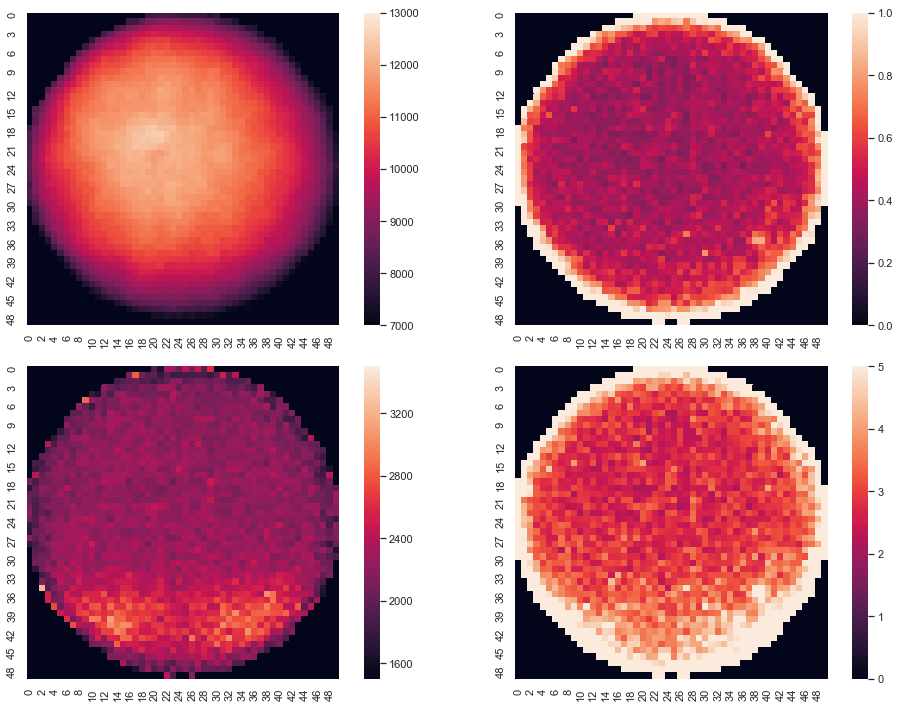

In [155]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Or using a specific colormap

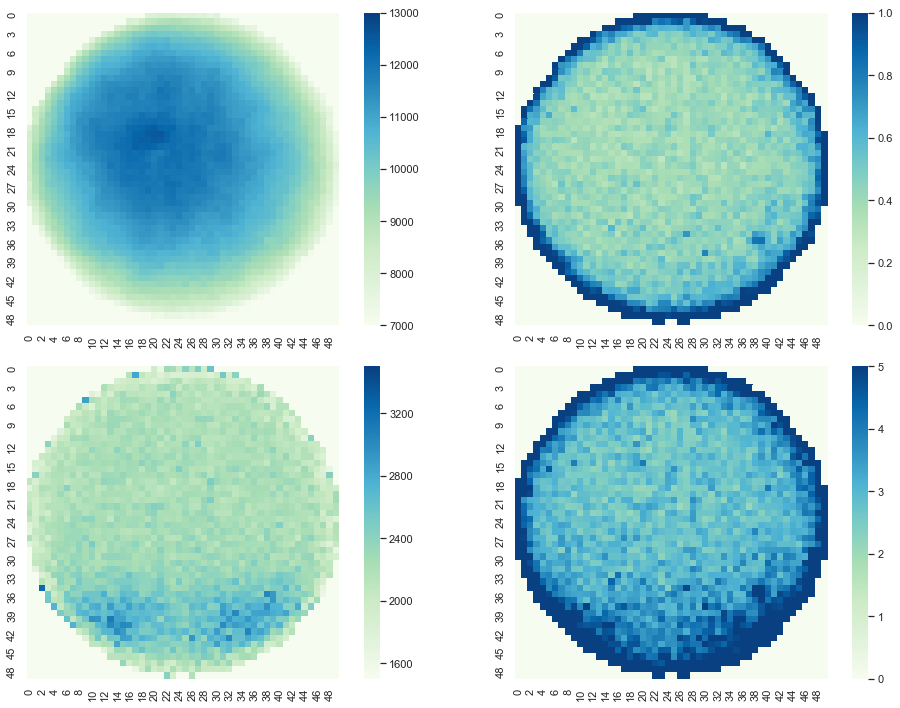

In [156]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))


## Compute the average of maps

### Get all amaps (for each time interval). Maps returned are regularized and errors relative.

In [157]:
amaps = get_maps_from_tsmap(tsm, 
                            times   = times, 
                            erange  = e_range,
                            ltrange = lt_range,
                            c2range = c2_range)


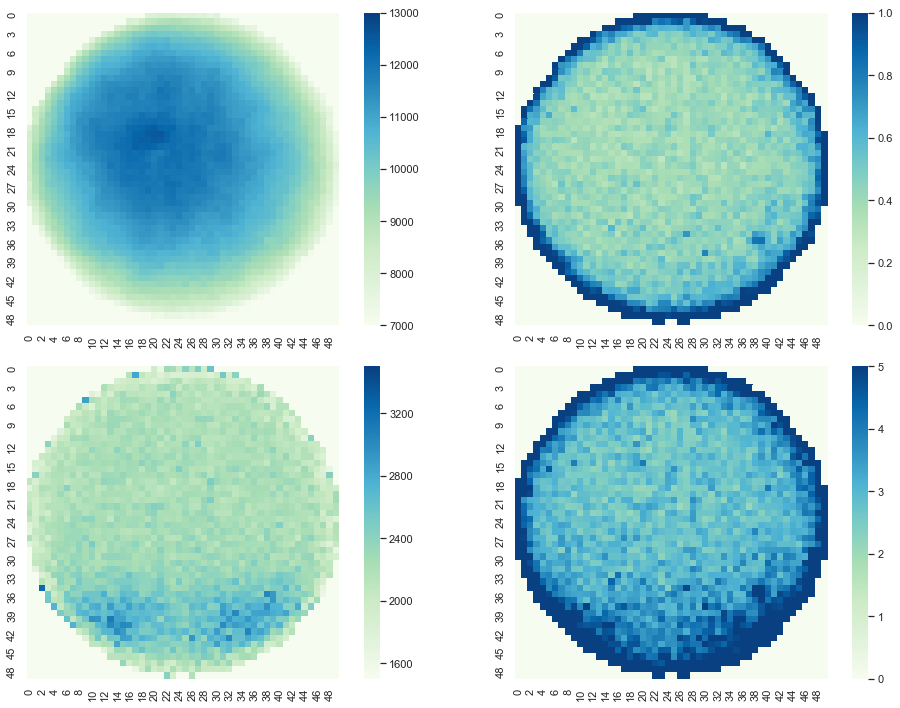

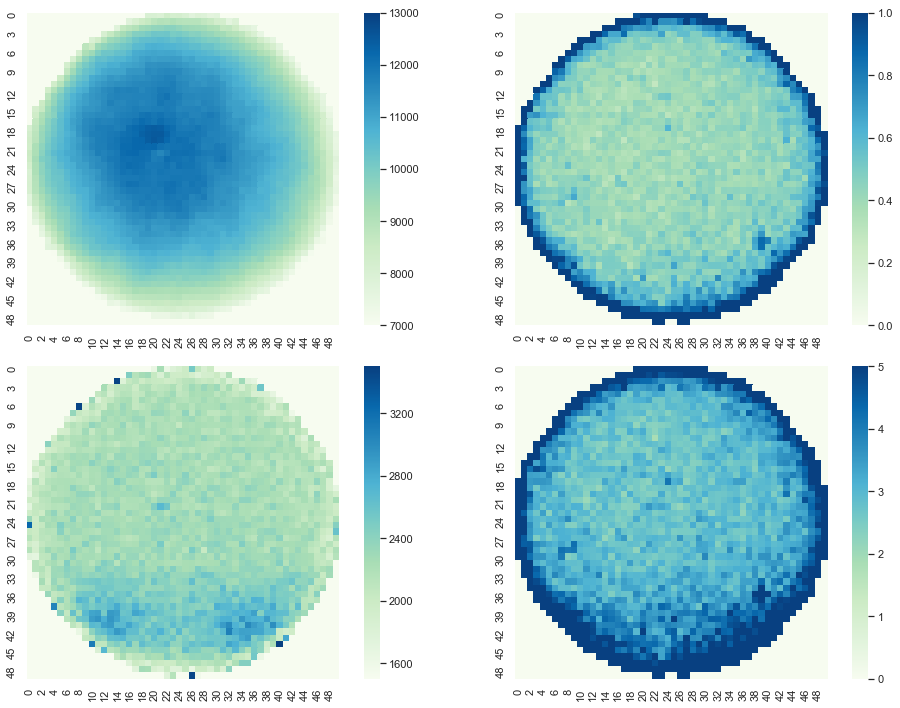

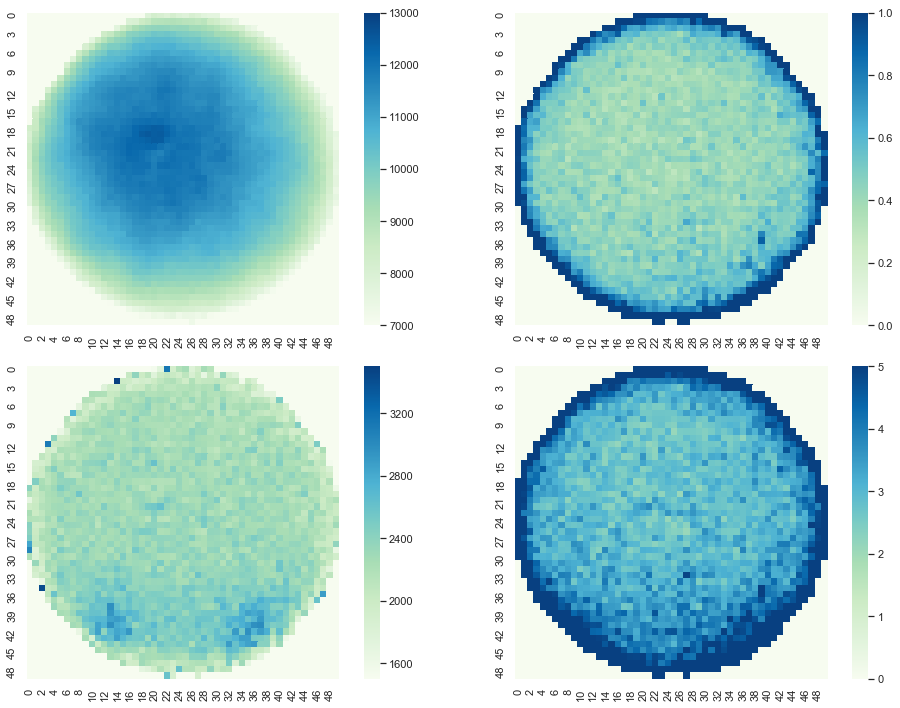

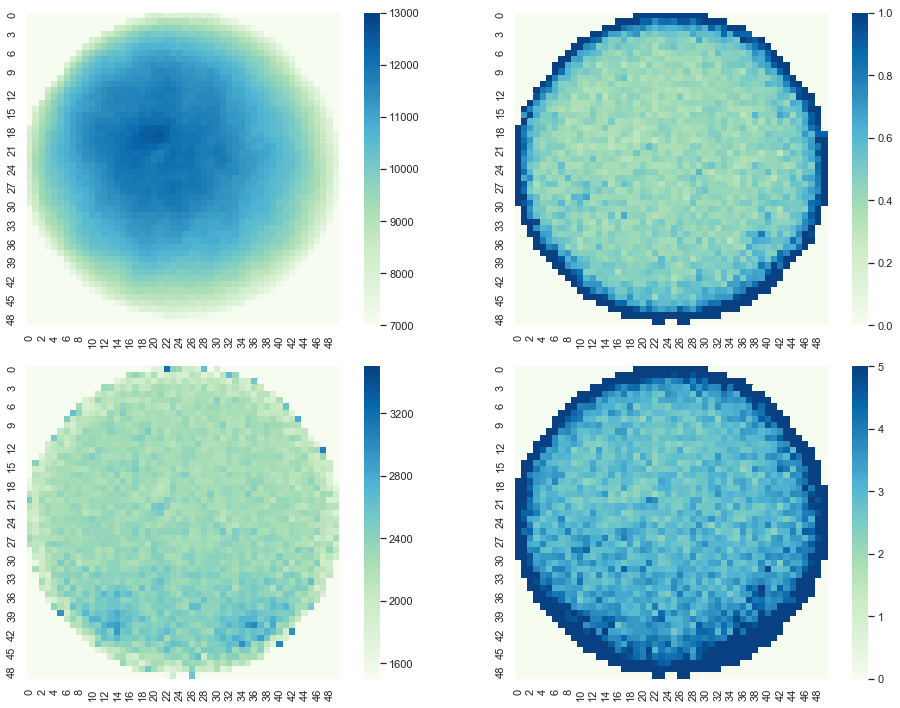

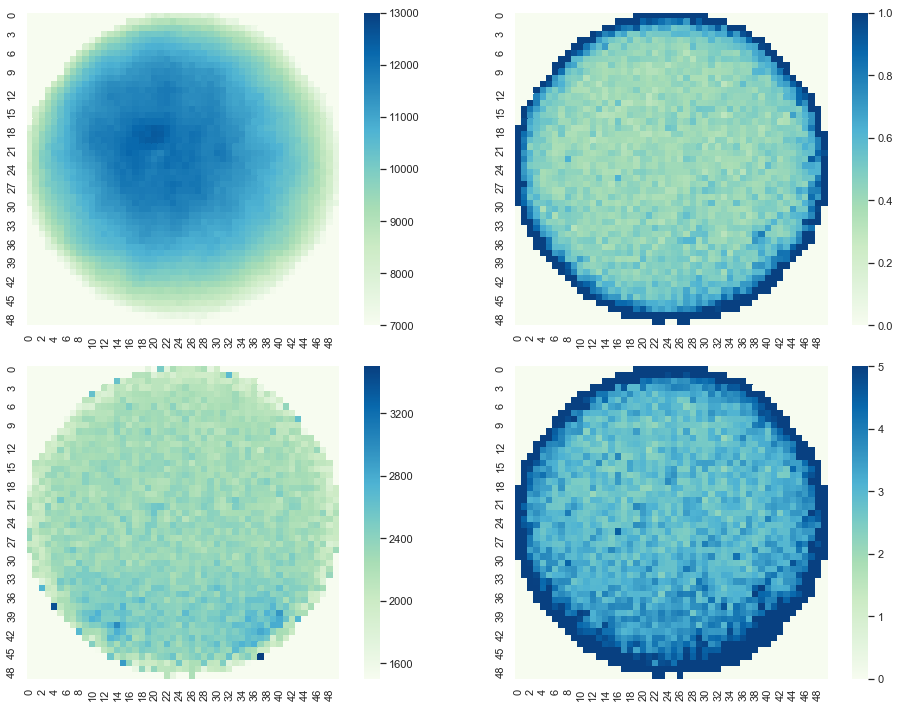

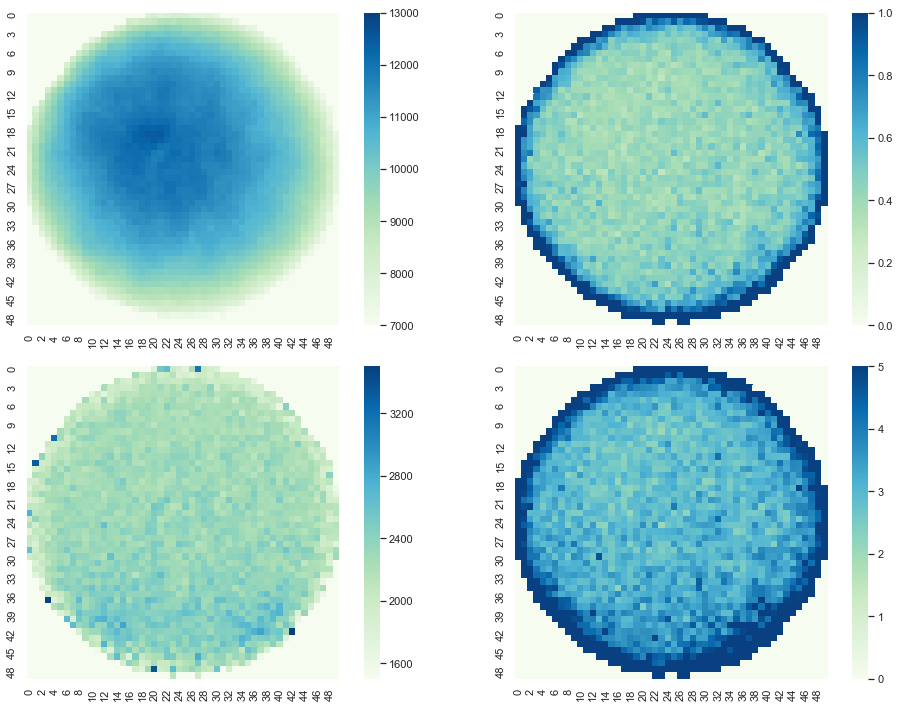

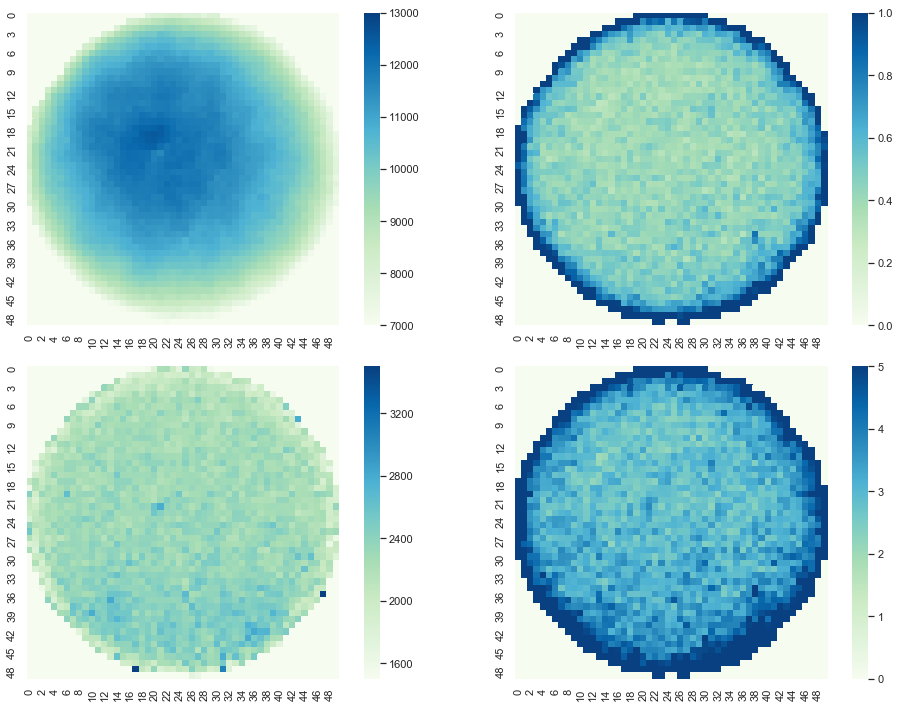

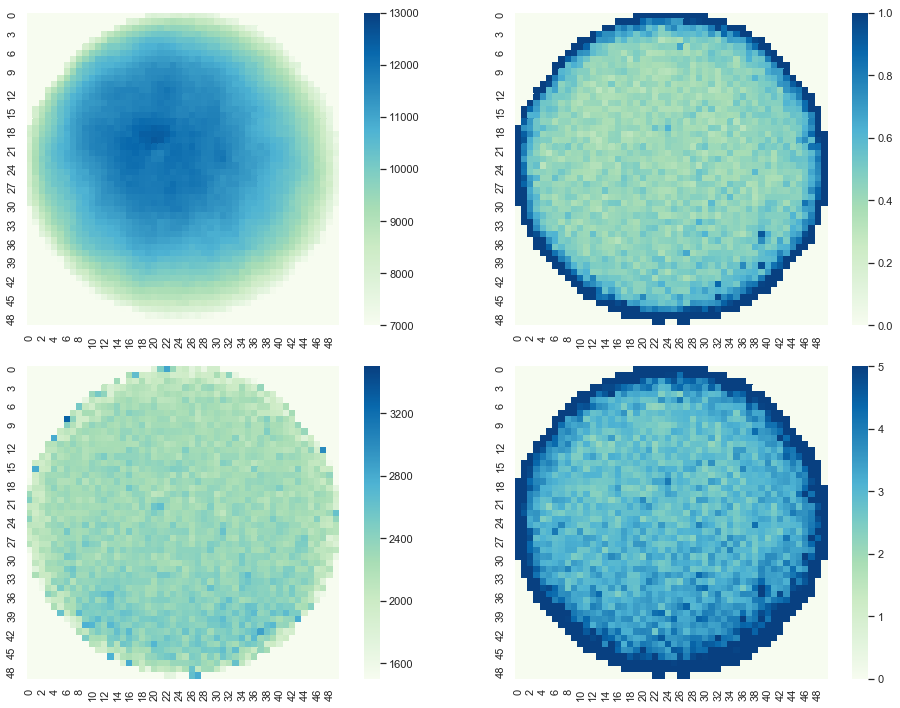

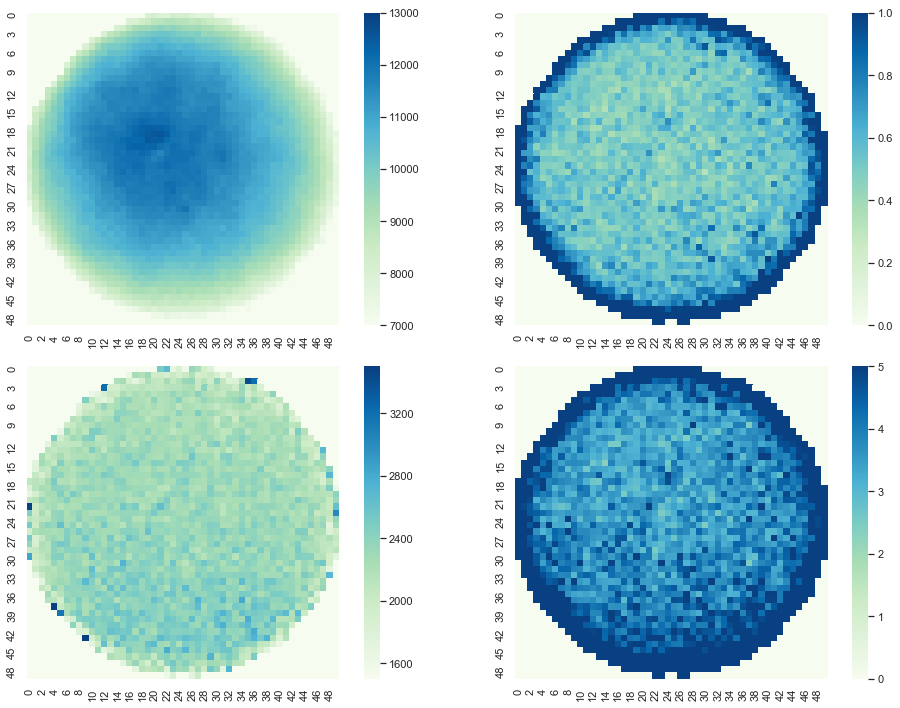

In [158]:
for amap in amaps:
    draw_xy_maps(amap,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [159]:
amAV = map_average(amaps)

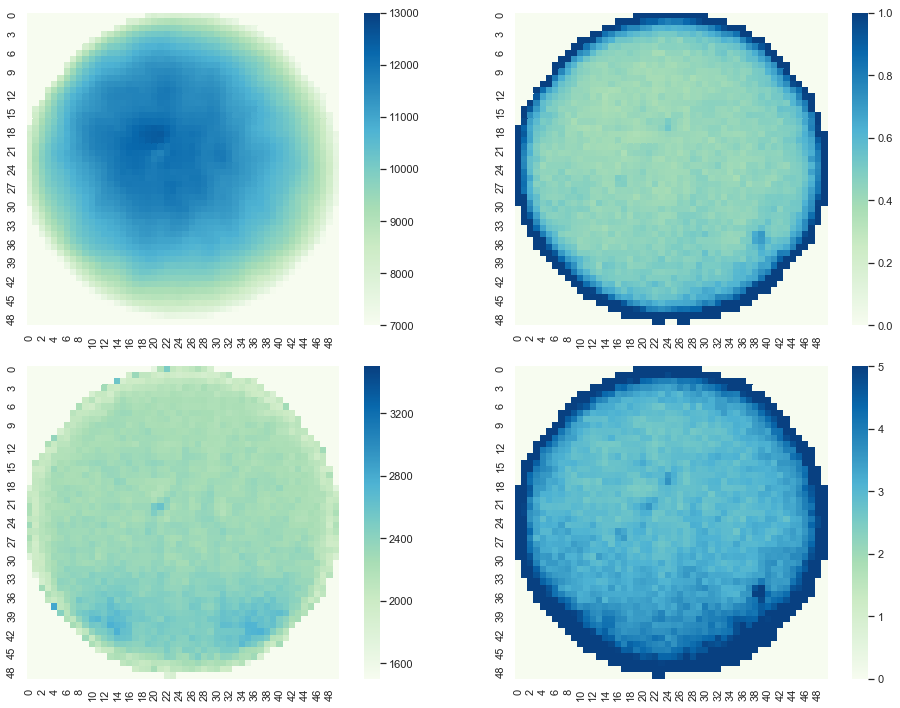

In [160]:
draw_xy_maps(amAV,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [161]:
amv = amap_average(amAV) 

In [162]:
amv

ASectorMap(chi2=1.4338687161663273, e0=10027.593567086658, lt=2266.9402461442323, e0u=0.6501372203129542, ltu=5.007063349693635)

### Next, NaNs are replaced by the average values of the variables (this is needed for the corrections). 

In [163]:
amAV0 = amap_replace_nan_by_mean(amAV, amMean=amv)

In [164]:
amap_average(amAV0) 

ASectorMap(chi2=1.3526560450627882, e0=10200.55186218443, lt=2283.361666877659, e0u=0.6122136194446912, ltu=4.624200128408294)

In [165]:
amap_max(amAV0)

ASectorMap(chi2=202.62310515115902, e0=12505.32955427274, lt=2820.504637417193, e0u=2.9134875254344106, ltu=45.19547549284082)

In [166]:
amap_min(amAV0)

ASectorMap(chi2=0.7447108377697607, e0=6548.691017873009, lt=1412.437521747194, e0u=0.3597063095491912, ltu=2.4870778234628252)

In [167]:
aMaps = []
for amap in amaps:
    amv = amap_average(amap) 
    aMaps.append(amap_replace_nan_by_mean(amap, amv))


### The maps can be saved to file

In [168]:
write_maps(amAV0, filename=fn.map_file_name)

### And retrieved from file

In [169]:
amap2 = read_maps(filename=fn.map_file_name)

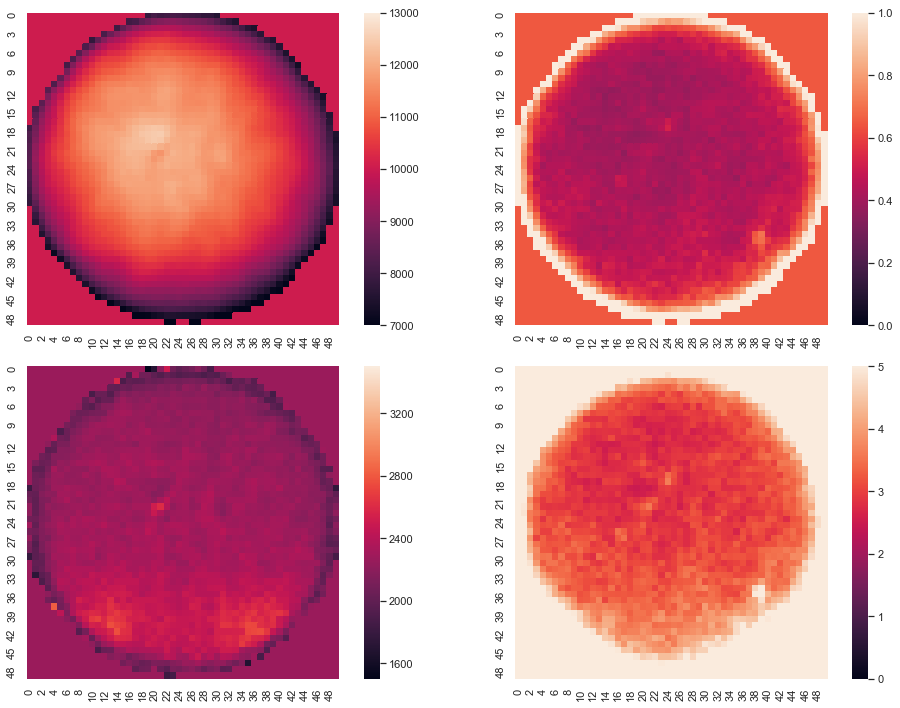

In [170]:
draw_xy_maps(amap2,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0, 1),
            lulims  = (0, 5),
            figsize=(14,10))

### To write the complete time-series of maps
```
write_maps_ts(aMaps : Iterable[ASectorMap], ts: np.array, filename : str)
```

In [171]:
write_maps_ts(aMaps, times, filename=fn.map_file_name_ts)

#### They can be read back

In [172]:
ts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [173]:
ts

0        0
1    10000
2    20000
3    30000
4    40000
5    50000
6    60000
7    70000
8    80000
dtype: int64

### One can plot the maps selected by type:

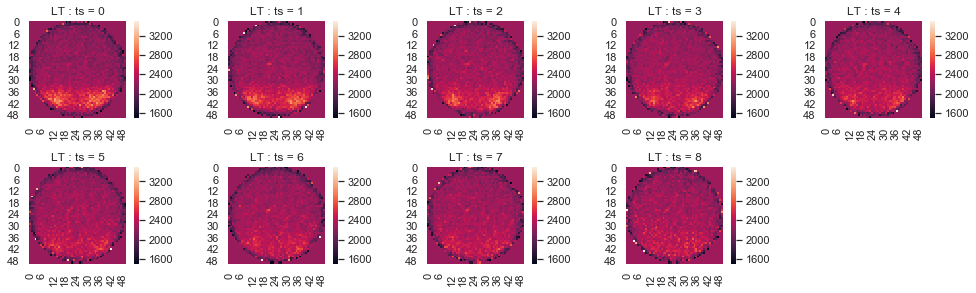

In [175]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.LT,
                ltlims  = (1500, 3500),
                figsize = (14,10))